In [136]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [137]:
import numpy as np
import pandas as pd

In [138]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [140]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [141]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [142]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [143]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [144]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [162]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
result=session.query(measurement.date, measurement.prcp).all()

In [163]:
# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(func.max(measurement.date)).all()
last_date[0][0]

'2017-08-23'

In [164]:
last_date=last_date[0][0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
last_year = int(dt.datetime.strftime(last_date, '%Y'))
last_month = int(dt.datetime.strftime(last_date, '%m'))
last_day = int(dt.datetime.strftime(last_date, '%d'))

first_date = dt.date(last_year, last_month, last_day) - dt.timedelta(days=365)
first_date= dt.datetime.strftime(first_date, '%Y-%m-%d')

print("The date 1 year ago: ", first_date)

The date 1 year ago:  2016-08-23


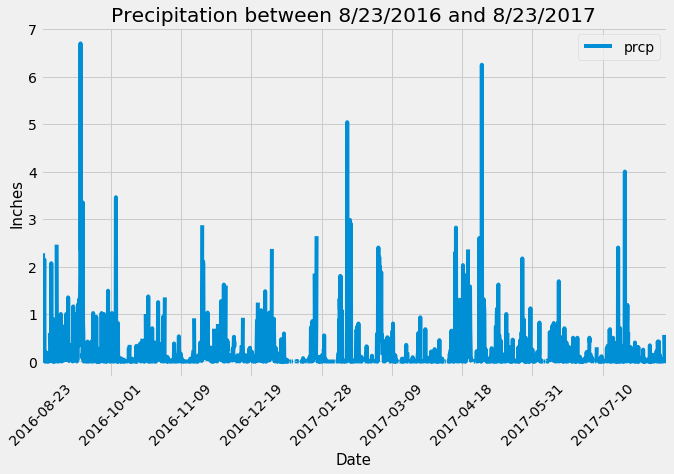

In [165]:
# Perform a query to retrieve the data and precipitation scores
result=session.query(measurement.date, measurement.prcp).filter(measurement.date >= first_date).filter(measurement.date <= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data=pd.DataFrame(result).set_index("date")

# Sort the dataframe by date
data=data.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
data.plot(title ="Precipitation between 8/23/2016 and 8/23/2017",figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Inches", fontsize=15)
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [83]:
# Design a query to show how many stations are available in this dataset?
session.query(station.station).all()
count=session.query(func.count(station.name)).all()[0][0]
print(f"Station Count: {count}")

Station Count: 9


In [86]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count=session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [112]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id=station_count[0][0]
station_name=session.query(station.name).filter(station.station==station_id).all()[0][0]
print(f"The most active station is {station_id}, {station_name}")

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == station_id).all()[0][0]
print(f"The lowest temperature recorded is {lowest_temp}F.")

highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == station_id).all()[0][0]
print(f"The highest temperature recorded is {highest_temp}F.")

avg_temp = round(session.query(func.avg(measurement.tobs)).filter(measurement.station == station_id).all()[0][0],1)
print(f"The average temperature recorded is {avg_temp}F.")

The most active station is USC00519281, WAIHEE 837.5, HI US
The lowest temperature recorded is 54.0F.
The highest temperature recorded is 85.0F.
The average temperature recorded is 71.7F.


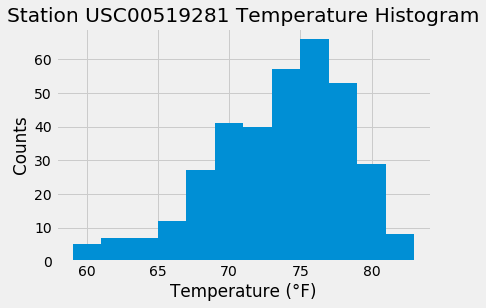

In [133]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result=session.query(measurement.tobs).filter(measurement.date >= '2016-08-23').\
filter(measurement.date <= '2017-08-23').filter(measurement.station == station_id).all()
temp = list(np.ravel(result))

plt.hist(temp, bins=12)
plt.title('Station USC00519281 Temperature Histogram')
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()



## Bonus Challenge Assignment

In [135]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
